# 3.3 데이터 시각화 하기 

### 3.3.2. 시계열 그래프 그리기

In [3]:
# 예제 3-37 kto_total.xlsx 파일 df로 불러오기 
import pandas as pd 
df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [4]:
# 예제 3-38 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')


In [5]:
# 예제 3-39 matplotlib 라이브러리 불러오기 
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [6]:
# 예제 3-40 중국 국적 데이터 필터링하기 
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


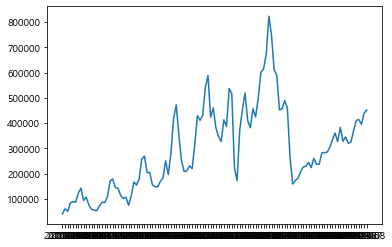

In [17]:
# 예제 3-41 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

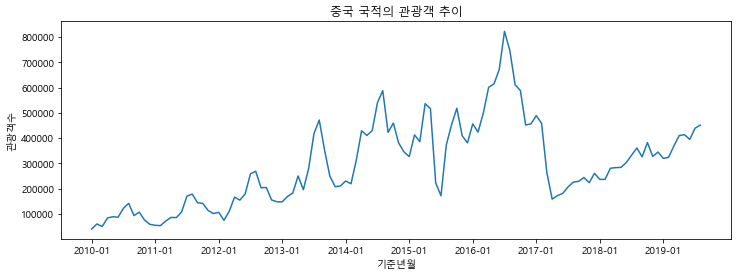

In [18]:
# 예제 3-42 시계열 그래프 그리기 2(꾸미기)
## 그래프 크기 조절 
plt.figure(figsize = (12, 4))

## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

## 그래프 표현하기 
plt.show()

In [25]:
# 예제 3-43 우리나라 방문하는 외국인 관관객 top5 리스트 만들기 
country_df = df.pivot_table(index = '국적', values = '계', aggfunc='sum')
country_df_sort = country_df.sort_values(by='계', ascending = False)
country_df_sort.head()

,계
국적,
중국,44296466
일본,26512853
미국,7668045
대만,6800913
홍콩,4797350


In [26]:
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

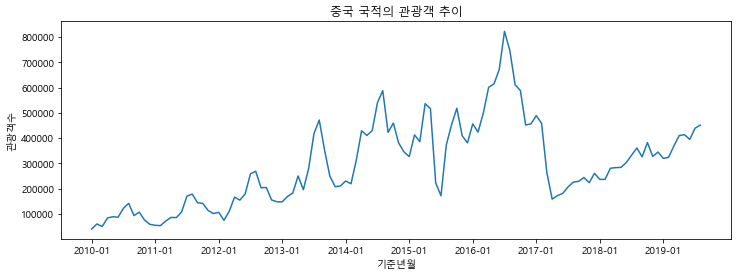

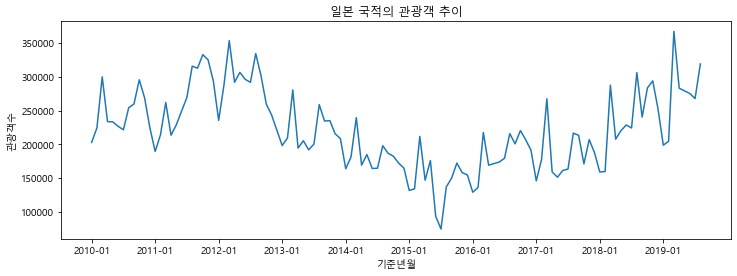

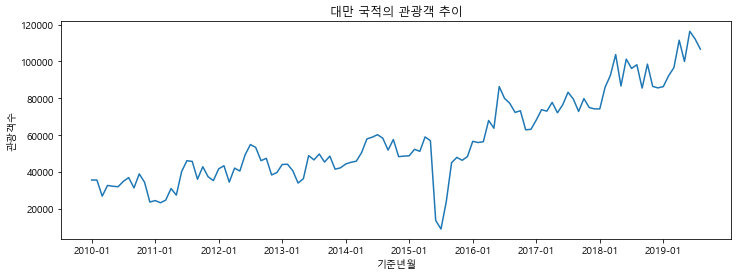

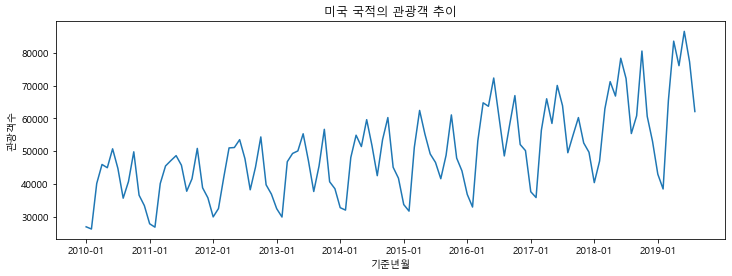

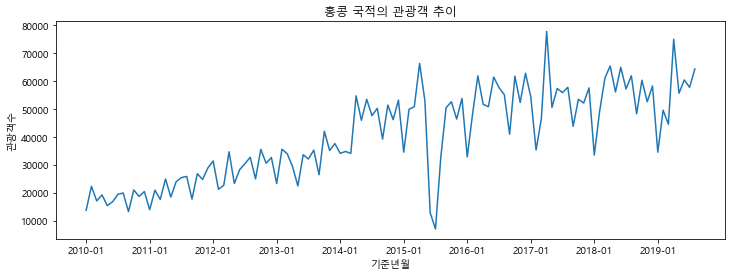

In [27]:
# 예제 3-44 반복문으로 여러 그래프 그리기 
for cntry in cntry_list: 
    # 국적 관광객만 추출하기 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

    ## 그래프 표현하기 
    plt.show()

### 3.3.3. 히트맵 그래프 그리기

In [ ]:
# 예제 3-45 df 데이터 head() 함수로 살펴보기 
df.head()

In [ ]:
# # 예제 3-46 str.slice() 함수를 이용해 년도, 월 컬럼 만들기 
# df['년도'] = df['기준년월'].str.slice(0,4)
# df['월'] = df['기준년월'].str.slice(5, 7)
# df.head()

In [31]:
year_list = [ ]
month_list = [ ]
for yearmonth  in df['기준년월']:
    year, month = yearmonth.split('-')
    year_list.append(year)
    month_list.append(month)

df['년도'] = year_list
df['월'] = month_list

In [32]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [ ]:
# 예제 3-47 중국인 관광객 필터링하기
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

In [ ]:
# 예제 3-48 pivot_table() 함수 이용하기 
df_pivot = df_filter.pivot_table(values = '관광'
                         , index = '년도'
                         , columns = '월')

df_pivot

In [ ]:
# 예제 3-49 히트맵 그래프 그리기에 필요한 라이브러리 import 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
# 예제 3-50 히트맵 그리프 그리기 
## 그래프 크기 설정 
plt.figure(figsize = (16, 10))

## 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

## 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

## 그래프 표현 
plt.show()

In [ ]:
# 예제 3-51 반복문으로 top5 국가 히트맵 그래프 그리기 
for cntry in cntry_list: 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광'
                             , index = '년도'
                             , columns = '월')
    
    # 그래프 크기 설정 
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기 
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

    # 그래프 타이틀 달기 
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현 
    plt.show()